In [1]:
from lambeq.backend.grammar import (Box, Cap, Cup, Diagram, Diagrammable,
                                    Functor, grammar, Id, Spider, Swap,
                                    Ty, Word)
from lambeq.backend.drawing import draw
import matplotlib.pyplot as plt
from lambeq import AtomicType

N = AtomicType.NOUN
S = AtomicType.SENTENCE


/Users/jurekeisinger/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


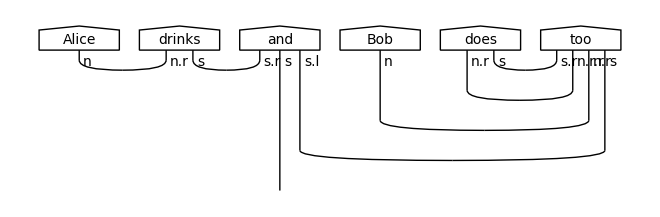

In [2]:
n, s = Ty('n'), Ty('s')


# create a diagram with the shape of verb phrase ellipsis
words = [
    Word('Alice', n),
    Word('drinks', n.r @ s),
    Word('and', s.r @ s @ s.l),
    Word('Bob', n),
    Word('does', n.r @ s),
    Word('too', s.r @ n.r.r @ n.r @ s)
]



cups = (Cup(N, N.r) @ Cup(S, S.r) @ Id(S) @ Id(s.l) @ Id(n) @ Id(n.r) @ Cup(s, s.r) @ Id(n.r.r) @ Id(n.r) @ Id(s) >> 
        Id(s) @ Id(s.l) @ Id(n) @ Cup(n.r, n.r.r) @ Id(n.r) @ Id(s) >> 
        Id(s) @ Id(s.l) @ Cup(n, n.r) @ Id(s) >> 
        Id(s) @ Cup(s.l, s))


diagram = Id().tensor(*words) >> cups


diagram.draw()


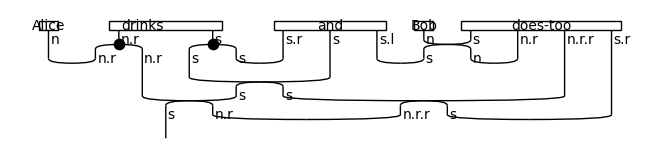

In [3]:
words = [
    Word('Alice', N),
    Word('drinks', N.r @ S),
    Word('and', S.r @ S @ S.l),
    Word('Bob', N),
    Word('does-too', S @ N.r @ N.r.r @ s.r)
]


firstLine = (Id(N) @ Spider(N.r, 1,2) @ Spider(S, 1,2) @ Id(s.r) @ Id(s) @ Id(s.l) @ Id(n) @ Id(s) @ Id(n.r) @ Id(n.r.r) @ Id(s.r) >> 
            Cup(n, n.r) @ Id(n.r) @ Id(s) @ Cup(s, s.r) @ Id(s) @ Id(s.l) @ Swap(n,s) @ Id(n.r) @ Id(n.r.r) @ Id(s.r) >> 
            Id(n.r) @ Id(s) @ Id(s) @ Cup(s.l, s) @ Cup(n, n.r) @ Id(n.r.r) @ Id(s.r) >> 
            Id(n.r) @ Swap(s,s) @ Id(n.r.r) @ Id(s.r) >> 
            Id(n.r) @ Id(s) @ Swap(s, n.r.r) @ Id(s.r) >> 
            Id(n.r) @ Id(s) @ Id(n.r.r) @ Cup(s, s.r) >> 
            Swap(n.r, s) @ Id(n.r.r) >> Id(s) @ Cup(n.r, n.r.r))



diagram = Id().tensor(*words) >> firstLine

diagram.draw()

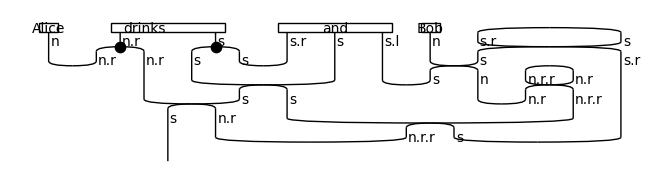

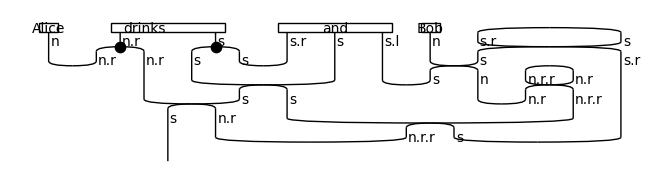

In [4]:
# we remove the word does-too step by step from the diagram, introducing two caps
firstLine = (Id(n) @ Id(n.r) @ Id(s) @ Id(s.r) @ Id(s) @ Id(s.l) @ Id(n) @ Cap(s.r, s) >> 
            Id(n) @ Id(n.r) @ Id(s) @ Id(s.r) @ Id(s) @ Id(s.l) @ Id(n) @ Swap(s.r, s) >> 
            Id(n) @ Id(n.r) @ Id(s) @ Id(s.r) @ Id(s) @ Id(s.l) @ Id(n) @ Id(s) @ Cap(N.r.r, N.r) @ Id(s.r) >> 
            Id(n) @ Spider(n.r, 1,2) @ Spider(s, 1,2) @ Id(s.r) @ Id(s) @ Id(s.l) @ Id(n) @ Id(s) @ Id(n.r.r) @ Id(n.r) @ Id(s.r) >> 
            Cup(n, n.r) @ Id(n.r) @ Id(s) @ Cup(s, s.r) @ Id(s) @ Id(s.l) @ Swap(n,s) @ Swap(n.r.r, n.r) @ Id(s.r) >> 
            Id(n.r) @ Id(s) @ Id(s) @ Cup(s.l, s) @ Cup(n, n.r) @ Id(n.r.r) @ Id(s.r) >> 
            Id(n.r) @ Swap(s,s) @ Id(n.r.r) @ Id(s.r) >> 
            Id(n.r) @ Id(s) @ Swap(s, n.r.r) @ Id(s.r) >> 
            Id(n.r) @ Id(s) @ Id(n.r.r) @ Cup(s, s.r) >> 
            Swap(n.r, s) @ Id(n.r.r) >> Id(s) @ Cup(n.r, n.r.r))

nextWords = [
    Word('Alice', n),
    Word('drinks', n.r @ s),
    Word('and', s.r @ s @ s.l),
    Word('Bob', n)
]

diagram = Id().tensor(*nextWords) >> firstLine
diagram.draw()
diagram.normal_form().draw()

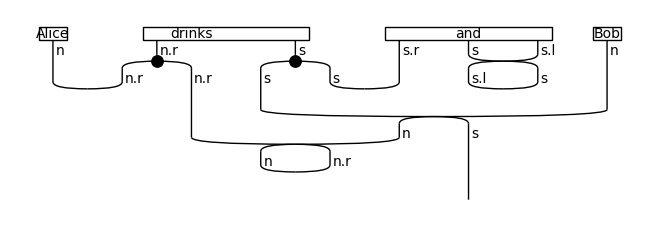

Remove Cups


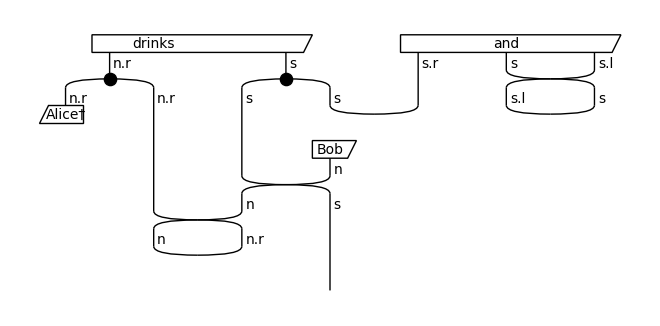

Replace and, remove Cups


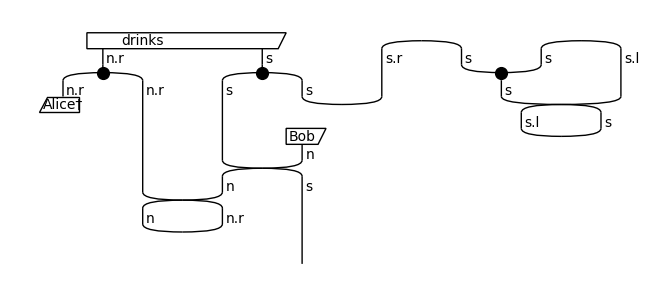

↓ normal form


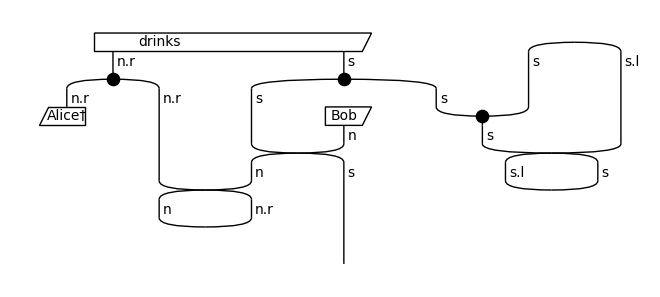

In [5]:
firstLine = (Id(n) @ Spider(n.r, 1,2) @ Spider(s, 1,2) @ Id(s.r) @ Id(s) @ Id(s.l) @ Id(n) >> 
            Cup(n, n.r) @ Id(n.r) @ Id(s) @ Cup(s, s.r) @ Swap(s, s.l) @ Id(n) >> 
            Id(n.r) @ Id(s) @ Cup(s.l, s) @ Id(n) >> 
            Id(n.r) @ Swap(s, n) >> 
            Swap(n.r, n) @ Id(s) >>
            Cup(n, n.r) @ Id(s))

nextWords = [
    Word('Alice', n),
    Word('drinks', n.r @ s),
    Word('and', s.r @ s @ s.l),
    Word('Bob', n)
]

diagram = Id().tensor(*nextWords) >> firstLine
diagram.draw()





from lambeq import RemoveSwapsRewriter, RemoveCupsRewriter
from lambeq import Rewriter 

remove_cups = RemoveCupsRewriter()
remove_swaps = RemoveSwapsRewriter()
diagWithoutSwaps = remove_cups(diagram)
print('Remove Cups')
diagWithoutSwaps.draw()


coordDiag = Rewriter(['coordination'])(diagram)


print('Replace and, remove Cups')
draw(remove_cups(coordDiag))
print('↓ normal form')

finalOne = remove_cups(coordDiag).normal_form()
draw(finalOne)

# print('Remove Swaps')
# draw(remove_swaps(finalOne))


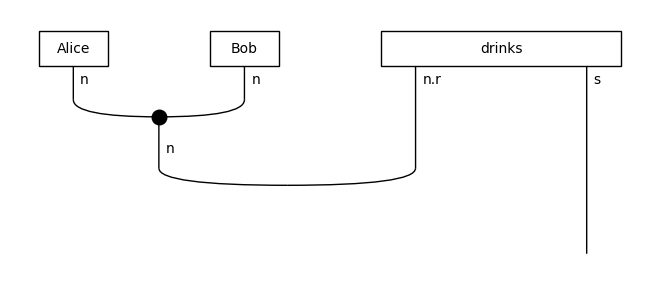

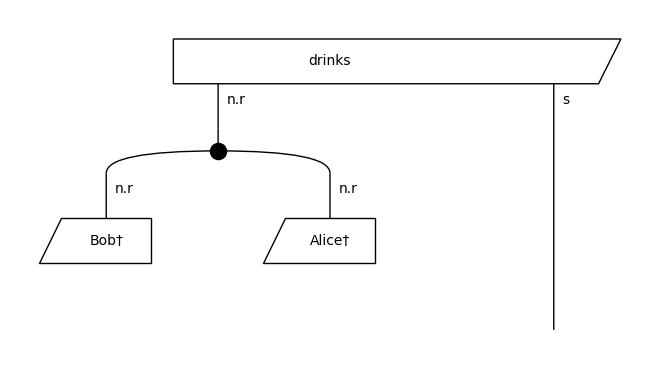

In [6]:
# final, final diagram 
firstLine = (Spider(n, 2, 1) @ Id(n.r) @ Id(s) >> 
            Cup(n, n.r) @ Id(s) )

nextWords = [
    Word('Alice', n),
    Word('Bob', n),
    Word('drinks', n.r @ s)
]

diagram = Id().tensor(*nextWords) >> firstLine
diagram.draw()

finalDiag = remove_cups(diagram)

draw(finalDiag)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/jurekeisinger/Library

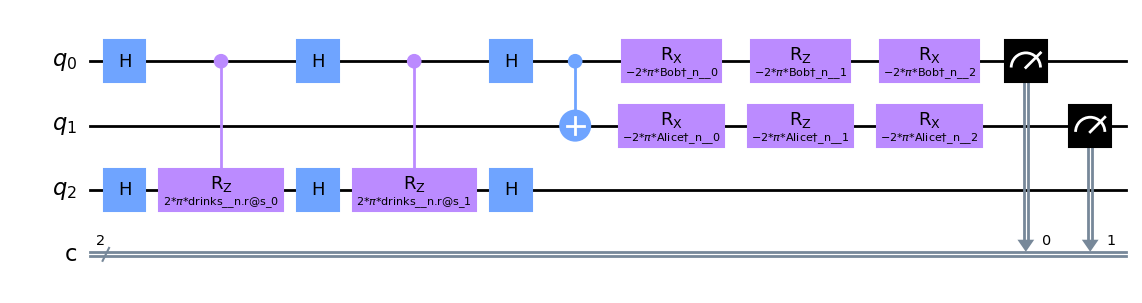

In [9]:
from lambeq import IQPAnsatz

# the easy example first 

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
circuit = ansatz(finalDiag)

from pytket.circuit.display import render_circuit_jupyter

tket_circuit = circuit.to_tk()

from pytket.extensions.qiskit import tk_to_qiskit

qiskit_circuit = tk_to_qiskit(tket_circuit)

qiskit_circuit.draw(output='mpl')

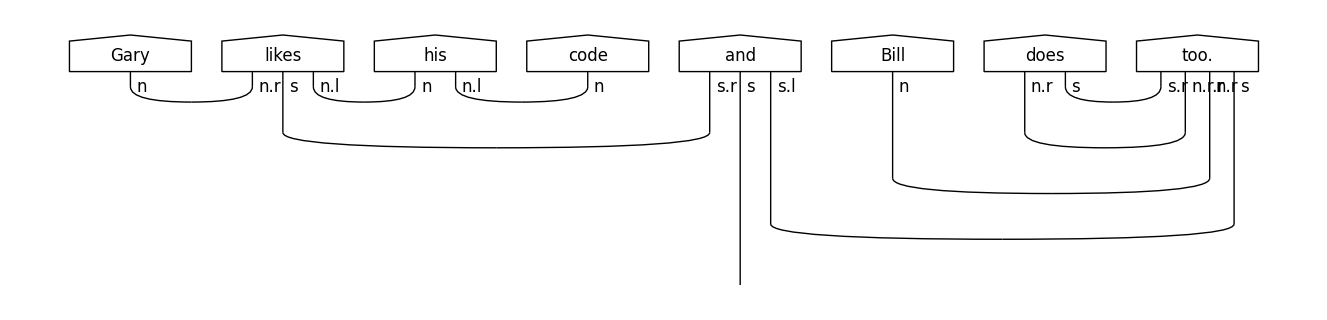

In [10]:
from lambeq import BobcatParser

sentence = 'Gary likes his code and Bill does too.'

# Parse the sentence and convert it into a string diagram
parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(sentence)

diagram.draw(figsize=(14,3), fontsize=12)




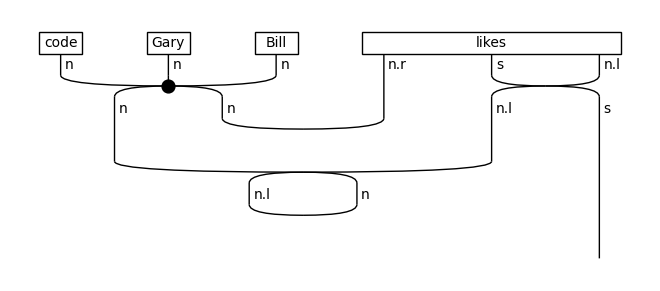

Remove Cups


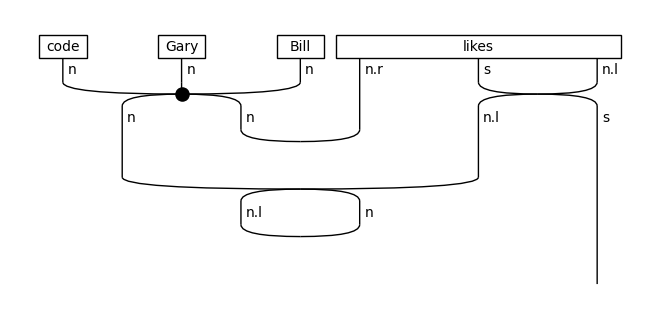

In [11]:
# final, final diagram 
firstLine = (Spider(n, 3, 2) @ Id(n.r) @ Swap(s, n.l) >>
            Id(n) @ Cup(n, n.r) @ Id(n.l) @ Id(s) >>
            Swap(n, n.l) @ Id(s) >>
            Cup(n.l, n) @ Id(s))

nextWords = [
    Word('code', n),
    Word('Gary', n),
    Word('Bill', n),
    Word('likes', n.r @ s @ n.l)
]

firstLineTest = (Swap(n.r, s) @ Id(n.l) @ Spider(n, 3, 2) >>
            Id(s) @ Id(n) @ Cup(n, n.r) @ Id(n.l) @  >>
            Swap(n, n.l) @ Id(s) >>
            Cup(n.l, n) @ Id(s))

nextWordsTest = [
    Word('likes', n.r @ s @ n.l),
    Word('code', n),
    Word('Gary', n),
    Word('Bill', n)
]

diagram = Id().tensor(*nextWords) >> firstLine
diagram.draw()


diagramTest = Id().tensor(*nextWordsTest) >> firstLineTest
diagramTest.draw()

print('Remove Cups')

draw(remove_cups(diagram))

# print('Remove Swaps')

# draw(remove_swaps(diagram))